In [64]:
import pandas as pd
import numpy as np
import math
import mil
import tensorflow
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mil.trainer import Trainer
from mil.trainer.trainer import Trainer
from mil.preprocessing import StandarizerBagsList
from mil.bag_representation import MILESMapping
from mil.validators import LeaveOneOut
from mil.metrics import AUC, BinaryAccuracy
from mil.models import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

PSA_label = []
PIRADS_label = []
PSA_train_bags = []
PIRADS_train_bags = []
#PSA_train_labels = []
bags = []
veci = []
vecj = []


df = pd.read_csv('C:/Users/Mavek/Desktop/Magisterka/Prostata_Cechy/MIL/Cechy3/data.txt', sep='\s+', header=None)
#df = pd.read_csv(r'data.txt', sep='\s+', header=None)


index = df.values[:,-1]
index = [int(i) for i in index]  # Przekształcenie wartości index na int

feature = df.values[:,:-1]

#feature = pd.to_numeric(feature.flatten(), errors='coerce').reshape(feature.shape)

unikalne_index = np.unique(index)

# grupowane_dane = [list(feature[index == val]) for val in unikalne_index]
# bags = grupowane_dane

grupowane_dane = [list(feature[index == val].tolist()) for val in unikalne_index]
bags = grupowane_dane

leb = pd.read_csv('C:/Users/Mavek/Desktop/Magisterka/Prostata_Cechy/MIL/Cechy3/Label.csv', header=None)
#leb = pd.read_csv(r'Label.csv', header=None)


leb = leb[0].str.split(';', expand = True)

leb = leb.apply(pd.to_numeric, errors='coerce')

j = 0

for i in range(len(leb.iloc[:,0])):

    # print(j , " j " , i , " i ")
    # print(unikalne_index[j] , " ui " , leb.iloc[i,0], " leb ")
    if leb.iloc[i,2] < 4 and unikalne_index[j] == leb.iloc[i,0]:
        

        PSA_label.append(1)
        PSA_train_bags.append(bags[j])
        j = j + 1

    elif leb.iloc[i,2] >= 4 and unikalne_index[j] == leb.iloc[i,0]:
        

        PSA_label.append(0)
        PSA_train_bags.append(bags[j])        
        j = j + 1

    elif unikalne_index[j] > leb.iloc[i,0]:
        pass

    else :
        j = j + 1

    
PSA_train_labels = np.array(PSA_label)
#PSA_train_bags = PSA_train_bags.astype(float)





j = 0

for i in range(len(leb.iloc[:,0])):

    if leb.iloc[i,1] < 4 and unikalne_index[j] == leb.iloc[i,0]:
        

        PIRADS_label.append(1)
        PIRADS_train_bags.append(bags[j])
        j = j + 1

    elif leb.iloc[i,1] >= 4 and unikalne_index[j] == leb.iloc[i,0]:
        

        PIRADS_label.append(0)
        PIRADS_train_bags.append(bags[j])        
        j = j + 1

    elif unikalne_index[j] > leb.iloc[i,0]:
        pass

    else :
        j = j + 1



PIRADS_train_labels = np.array(PIRADS_label)

SUPER_BAG = PIRADS_train_bags
SUPER_LABEL = PIRADS_train_labels

PIRADS_train_bags, PIRADS_test_bags, PIRADS_train_labels,PIRADS_test_labels = train_test_split(PIRADS_train_bags,PIRADS_train_labels,test_size=0.3, stratify=PIRADS_train_labels, random_state=42)


In [65]:
# from mil.data.datasets import musk1, musk2, protein, elephant, corel_dogs, \
#                               ucsb_breast_cancer, web_recommendation_1, birds_brown_creeper, \
#                               mnist_bags


# (bags_train, y_train), (bags_test, y_test) = musk1.load()
# print(bags_train)
# print(PSA_train_bags)


# # Count elements in PSA_train_labels that are and are not numbers
# numeric_labels = [x for x in PSA_train_labels if isinstance(x, (int, float))]
# non_numeric_labels = [x for x in PSA_train_labels if not isinstance(x, (int, float))]

# print("Number of numeric elements in PSA_train_labels:", len(numeric_labels))
# print("Number of non-numeric elements in PSA_train_labels:", len(non_numeric_labels))

# # Get indices, values, and types of elements in PSA_train_labels that are not numbers
# non_numeric_labels_info = [(index, x, type(x)) for index, x in enumerate(PSA_train_labels) if not isinstance(x, (int, float))]
# print("Indices, values, and types of non-numeric elements in PSA_train_labels:", non_numeric_labels_info)

# # Count elements in PSA_train_bags that are and are not numbers
# numeric_elements = [item for bag in PSA_train_bags for sublist in bag for item in sublist if isinstance(item, (int, float))]
# non_numeric_elements = [item for bag in PSA_train_bags for sublist in bag for item in sublist if not isinstance(item, (int, float))]

# print("Number of numeric elements in PSA_train_bags:", len(numeric_elements))
# print("Number of non-numeric elements in PSA_train_bags:", len(non_numeric_elements))

# # Get indices, values, and types of elements in PSA_train_bags that are not numbers
# non_numeric_elements_info = [(bag_index, sublist_index, item_index, item, type(item)) for bag_index, bag in enumerate(PSA_train_bags) for sublist_index, sublist in enumerate(bag) for item_index, item in enumerate(sublist) if not isinstance(item, (int, float))]
# print("Indices, values, and types of non-numeric elements in PSA_train_bags:", non_numeric_elements_info)


In [66]:
# list_cech = ['Cechy1', 'Cechy2', 'Cechy3']

# lista_leb = []

# for iterator in range(len(list_cech)):
#     df = pd.read_csv(f'C:\\Users\\Mavek\\Desktop\\Magisterka\\Prostata_Cechy\\MIL\\{list_cech[iterator]}\\data.txt', sep='\s+', header=None)

#     index = df.values[:, -1]
#     index = [int(i) for i in index]

#     feature = df.values[:, :-1]

#     unikalne_index = np.unique(index)

#     lista_leb.append(unikalne_index)
#     grupowane_dane = [list(feature[index == val].tolist()) for val in unikalne_index]
#     bags = grupowane_dane

#     # for ii in range(len(unikalne_index)):
#     #     if ii == unikalne_index[ii]:
#     #         lista_leb.append(ii)
#     # else:
#     #     lista_leb.append(np.nan)


#     leb = pd.read_csv(f'C:\\Users\\Mavek\\Desktop\\Magisterka\\Prostata_Cechy\\MIL\\{list_cech[iterator]}\\Label.csv', header=None)

# lista_leb[1] = lista_leb[1].astype(float)  # Convert to float
# lista_leb[1] = np.insert(lista_leb[1], 55, np.nan)

# indices_val = np.where(np.in1d(SUPER_BAG, PIRADS_test_bags))[0]
# print(indices_val)


# XD = SUPER_LABEL[indices_val]
# print(XD)
# print(PIRADS_test_labels)

In [67]:

PSA_history_F1 = [] 
tempF1 = []
linearF1 = []
polyF1 = []
rbfF1 = []
sigmoidF1 = []

#------------------------------------------------------------------------------------------------------------

param_kernel = ['linear','poly','rbf','sigmoid']
param_c = range(-10,11)
#param_c = range(0,1)

# instantiate trainer
PSA_trainer = Trainer()

for kernel in param_kernel:
    for c in param_c:

        # preparing trainer
        metrics = ['acc']
        # model = SVC(kernel='linear', C=1, class_weight='balanced')
        model = SVC(kernel=kernel, C=2**c, class_weight='balanced',random_state=42)
        pipeline = [('scale', StandarizerBagsList()), ('disc_mapping', MILESMapping())]
        PSA_trainer.prepare(model, preprocess_pipeline=pipeline ,metrics=metrics)

        # fitting trainer
        valid = LeaveOneOut()

        PSA_history = PSA_trainer.fit(PSA_train_bags, PSA_train_labels, sample_weights='balanced', validation_strategy=valid, verbose=1)


        for key, value in PSA_history.items():
            print(f'{key}: {value}')
            
        #POPRAWIC LICZENIE F1 SCORE
 
       
        PSA_TN = 0
        PSA_TP = 0
        PSA_FN = 0
        PSA_FP = 0

   

        for metrics_train, metrics_val in zip(PSA_train_labels, PSA_history["metrics_val"]):
            
            # print(metrics_train['accuracy'],"train")
            # print(metrics_val['accuracy'], "val")
            

            # if metrics_train == 1 and metrics_val['accuracy'] == 1:
            #     PSA_TP = PSA_TP + 1
            # elif metrics_train == 0 and metrics_val['accuracy'] == 0:
            #     PSA_TN = PSA_TN + 1
            # elif metrics_train == 1 and metrics_val['accuracy'] == 0:
            #     PSA_FP = PSA_FP + 1
            # elif metrics_train == 0 and metrics_val['accuracy'] == 1:
            #     PSA_FN = PSA_FN + 1

            if metrics_val['accuracy'] == 1 and metrics_train == 1:
                PSA_TP = PSA_TP + 1
            elif metrics_val['accuracy'] == 1 and metrics_train == 0:
                PSA_TN = PSA_TN + 1
            elif metrics_val['accuracy'] == 0 and metrics_train == 1:
                PSA_FP = PSA_FP + 1
            elif metrics_val['accuracy'] == 1 and metrics_train == 0:
                PSA_FN = PSA_FN + 1


        PSA_history_F1 = 2*(PSA_TP)/(2*PSA_TP+PSA_FP+PSA_FN)
        print(PSA_history_F1)

        tempF1.append(PSA_history_F1)

        if(kernel=='linear'):
            linearF1.append(PSA_history_F1)
        elif(kernel=='poly'):
            polyF1.append(PSA_history_F1)
        elif(kernel=='rbf'):
            rbfF1.append(PSA_history_F1)
        elif(kernel=='sigmoid'):
            sigmoidF1.append(PSA_history_F1)



41/41 [==============================] - 5s 120ms/step - train_accuracy: 0.3250 - val_accuracy: 0.0000e+00
metrics_train: [{'accuracy': 0.3}, {'accuracy': 0.3}, {'accuracy': 0.325}, {'accuracy': 0.325}, {'accuracy': 0.325}, {'accuracy': 0.325}, {'accuracy': 0.325}, {'accuracy': 0.325}, {'accuracy': 0.3}, {'accuracy': 0.3}, {'accuracy': 0.325}, {'accuracy': 0.325}, {'accuracy': 0.325}, {'accuracy': 0.325}, {'accuracy': 0.325}, {'accuracy': 0.325}, {'accuracy': 0.325}, {'accuracy': 0.325}, {'accuracy': 0.325}, {'accuracy': 0.325}, {'accuracy': 0.3}, {'accuracy': 0.3}, {'accuracy': 0.325}, {'accuracy': 0.3}, {'accuracy': 0.325}, {'accuracy': 0.325}, {'accuracy': 0.325}, {'accuracy': 0.3}, {'accuracy': 0.325}, {'accuracy': 0.325}, {'accuracy': 0.325}, {'accuracy': 0.325}, {'accuracy': 0.325}, {'accuracy': 0.3}, {'accuracy': 0.325}, {'accuracy': 0.3}, {'accuracy': 0.3}, {'accuracy': 0.3}, {'accuracy': 0.3}, {'accuracy': 0.325}, {'accuracy': 0.325}]
metrics_val: [{'accuracy': 1.0}, {'accurac

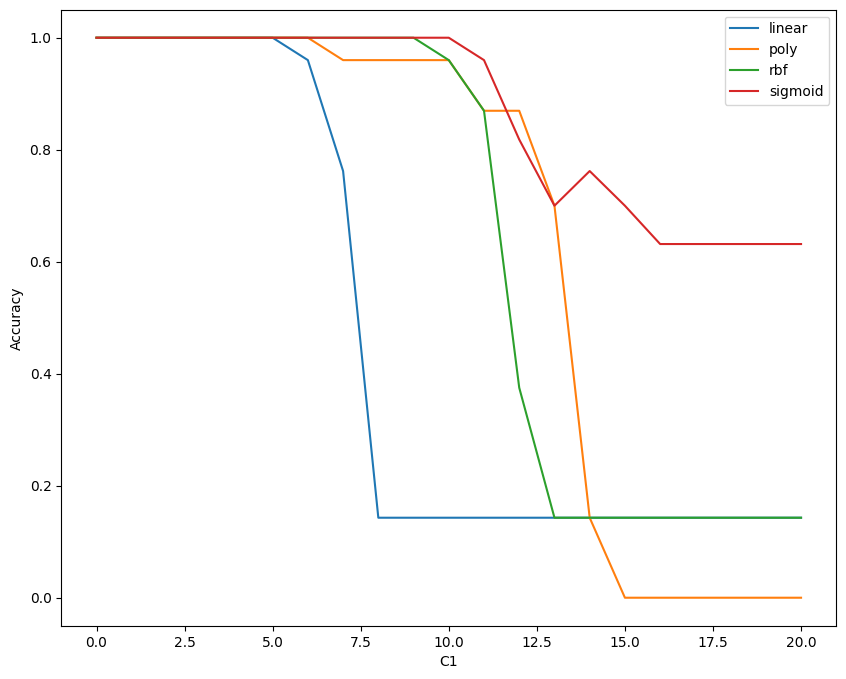

In [68]:
# plt.plot(tempF1)
# plt.show()



plt.rcParams["figure.figsize"] = (10, 8)


plt.figure()

plt.plot(linearF1,label='linear')

plt.plot(polyF1,label='poly')

plt.plot(rbfF1,label='rbf')

plt.plot(sigmoidF1,label='sigmoid')
plt.legend()
plt.xlabel("C1")
plt.ylabel("Accuracy")

plt.show()

In [71]:
PIRADS_TN = 0
PIRADS_TP = 0
PIRADS_FN = 0
PIRADS_FP = 0
PIRADS_history_F1 = [] 
tempF1 = []
linearF1 = []
polyF1 = []
rbfF1 = []
sigmoidF1 = []
#------------------------------------------------------------------------------------------------------------
param_kernel = ['linear','poly','rbf','sigmoid']
param_c = range(-10,11)

# instantiate trainer
PIRADS_trainer = Trainer()

for kernel in param_kernel:
    for c in param_c:

        # preparing trainer
        metrics = ['acc']
        model = SVC(kernel=kernel, C=2**c, class_weight='balanced')
        pipeline = [('scale', StandarizerBagsList()), ('disc_mapping', MILESMapping())]
        PIRADS_trainer.prepare(model, preprocess_pipeline=pipeline ,metrics=metrics)

        # fitting trainer
        valid = LeaveOneOut()

        PIRADS_history = PIRADS_trainer.fit(PIRADS_train_bags, PIRADS_train_labels, sample_weights='balanced', validation_strategy=valid, verbose=1)


        
        #PIRADS_Predict_labels3 = PIRADS_trainer.predict(PIRADS_test_bags)
        # print(PIRADS_history)
        # print(PIRADS_history['metrics_val'])
        # for key, value in PIRADS_history.items():
        #     print(f'{key}: {value}')
            
        #---------------------------------------------------------------------------------------
        # F1 score dla LOO

        for metrics_train, metrics_val in zip(PIRADS_train_labels, PIRADS_history["metrics_val"]):
            
            # print(metrics_train['accuracy'],"train")
            # print(metrics_val['accuracy'], "val")

            # if metrics_train['accuracy'] == 1 and metrics_val['accuracy'] == 1:
            #     PIRADS_TP = PIRADS_TP + 1
            # elif metrics_train['accuracy'] == 0 and metrics_val['accuracy'] == 0:
            #     PIRADS_TN = PIRADS_TN + 1
            # elif metrics_train['accuracy'] == 1 and metrics_val['accuracy'] == 0:
            #     PIRADS_FP = PIRADS_FP + 1
            # elif metrics_train['accuracy'] == 0 and metrics_val['accuracy'] == 1:
            #     PIRADS_FN = PIRADS_FN + 1

            if metrics_val['accuracy'] == 1 and metrics_train == 1:
                PIRADS_TP = PIRADS_TP + 1
            elif metrics_val['accuracy'] == 1 and metrics_train == 0:
                PIRADS_TN = PIRADS_TN + 1
            elif metrics_val['accuracy'] == 0 and metrics_train == 1:
                PIRADS_FP = PIRADS_FP + 1
            elif metrics_val['accuracy'] == 1 and metrics_train == 0:
                PIRADS_FN = PIRADS_FN + 1


        PIRADS_history_F1 = 2*(PIRADS_TP)/(2*PIRADS_TP+PIRADS_FP+PIRADS_FN)
        print(PIRADS_history_F1)

        tempF1.append(PIRADS_history_F1)

        if(kernel=='linear'):
            linearF1.append(PIRADS_history_F1)
        elif(kernel=='poly'):
            polyF1.append(PIRADS_history_F1)
        elif(kernel=='rbf'):
            rbfF1.append(PIRADS_history_F1)
        elif(kernel=='sigmoid'):
            sigmoidF1.append(PIRADS_history_F1)


67/67 [==============================] - 20s 295ms/step - train_accuracy: 0.3485 - val_accuracy: 0.0000e+00
0.0
67/67 [==============================] - 20s 299ms/step - train_accuracy: 0.3485 - val_accuracy: 0.0000e+00
0.0
67/67 [==============================] - 20s 296ms/step - train_accuracy: 0.3485 - val_accuracy: 0.0000e+00
0.0
67/67 [==============================] - 20s 301ms/step - train_accuracy: 0.3485 - val_accuracy: 0.0000e+00
0.0
67/67 [==============================] - 19s 286ms/step - train_accuracy: 0.3485 - val_accuracy: 0.0000e+00
0.0
67/67 [==============================] - 19s 281ms/step - train_accuracy: 0.5606 - val_accuracy: 0.0000e+00
0.02247191011235955
67/67 [==============================] - 19s 282ms/step - train_accuracy: 0.7121 - val_accuracy: 1.0000
0.09876543209876543
67/67 [==============================] - 19s 283ms/step - train_accuracy: 0.9242 - val_accuracy: 1.0000
0.19487179487179487
67/67 [==============================] - 19s 283ms/step - train_

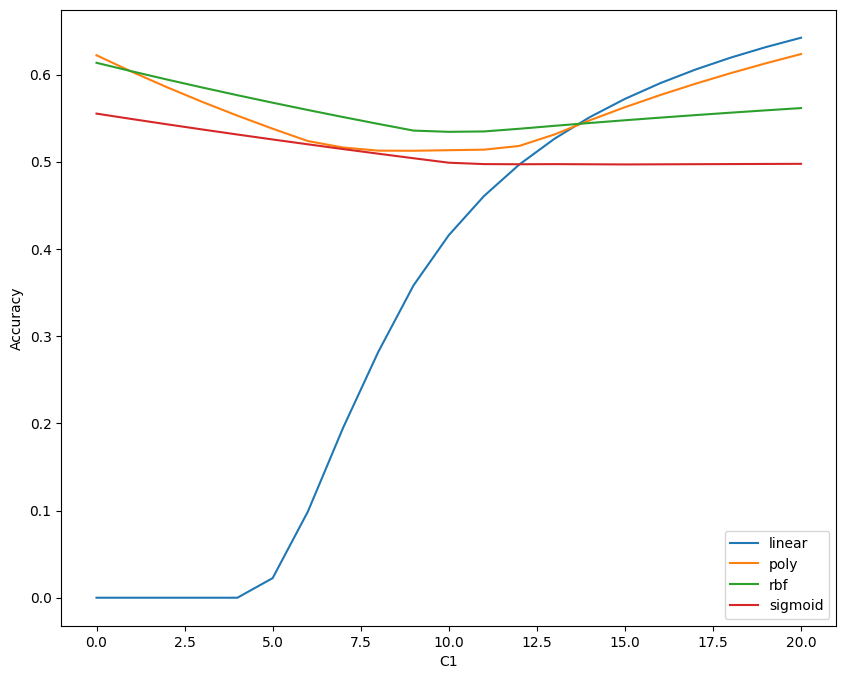

In [72]:
# plt.plot(tempF1)

# plt.show()



plt.rcParams["figure.figsize"] = (10, 8)


plt.figure()

plt.plot(linearF1,label='linear')

plt.plot(polyF1,label='poly')

plt.plot(rbfF1,label='rbf')

plt.plot(sigmoidF1,label='sigmoid')
plt.legend()
plt.xlabel("C1")
plt.ylabel("Accuracy")

plt.show()

In [ ]:

# PIRADS_TN = 0
# PIRADS_TP = 0
# PIRADS_FN = 0
# PIRADS_FP = 0

# PIRADS_trainer_P = Trainer()

# metrics = ['acc']
# model = SVC(kernel='linear', C=1, class_weight='balanced')
# pipeline = [('scale', StandarizerBagsList()), ('disc_mapping', MILESMapping())]
# PIRADS_trainer_P.prepare(model, preprocess_pipeline=pipeline ,metrics=metrics)


# # fitting trainer
# valid = LeaveOneOut()


# PIRADS_history_P = PIRADS_trainer_P.fit(PIRADS_train_bags, PIRADS_train_labels, sample_weights='balanced', validation_strategy=valid, verbose=1)

# PIRADS_Predict_labels = PIRADS_trainer_P.predict(PIRADS_test_bags)

# if metrics_train == 1 and PIRADS_Predict_labels == 1:
#     PIRADS_TP = PIRADS_TP + 1
# elif metrics_train == 0 and PIRADS_Predict_labels == 0:
#     PIRADS_TN = PIRADS_TN + 1
# elif metrics_train == 1 and PIRADS_Predict_labels == 0:
#     PIRADS_FP = PIRADS_FP + 1
# elif metrics_train == 0 and PIRADS_Predict_labels == 1:
#     PIRADS_FN = PIRADS_FN + 1

# PIRADS_history_F1 = 2*(PIRADS_TP)/(2*PIRADS_TP+PIRADS_FP+PIRADS_FN)
# print(PIRADS_history_F1)

In [ ]:

# # #POPRAWIC LICZENIE F1 SCORE
# for metrics_train, PIRADS_Predict_labels in zip(PIRADS_train_labels, PIRADS_Predict_labels):
    
    
#     if metrics_train == 1 and PIRADS_Predict_labels == 1:
#         PIRADS_TP = PIRADS_TP + 1
#     elif metrics_train == 0 and PIRADS_Predict_labels == 0:
#         PIRADS_TN = PIRADS_TN + 1
#     elif metrics_train == 1 and PIRADS_Predict_labels == 0:
#         PIRADS_FP = PIRADS_FP + 1
#     elif metrics_train == 0 and PIRADS_Predict_labels == 1:
#         PIRADS_FN = PIRADS_FN + 1


# PIRADS_history_F1 = 2*(PIRADS_TP)/(2*PIRADS_TP+PIRADS_FP+PIRADS_FN)
# print(PIRADS_history_F1)
# PIRADS_history_F1 = 2*(PIRADS_TP)/(2*PIRADS_TP+PIRADS_FP+PIRADS_FN)
# print(PIRADS_history_F1)


        # PIRADS_TN = 0
        # PIRADS_TP = 0
        # PIRADS_FN = 0
        # PIRADS_FP = 0

        # # #POPRAWIC LICZENIE F1 SCORE
        # for metrics_train, PIRADS_Predict_labels in zip(PIRADS_train_labels, PIRADS_Predict_labels):
            
            
        #     if metrics_train == 1 and PIRADS_Predict_labels == 1:
        #         PIRADS_TP = PIRADS_TP + 1
        #     elif metrics_train == 0 and PIRADS_Predict_labels == 0:
        #         PIRADS_TN = PIRADS_TN + 1
        #     elif metrics_train == 1 and PIRADS_Predict_labels == 0:
        #         PIRADS_FP = PIRADS_FP + 1
        #     elif metrics_train == 0 and PIRADS_Predict_labels == 1:
        #         PIRADS_FN = PIRADS_FN + 1


        # PIRADS_history_F1 = 2*(PIRADS_TP)/(2*PIRADS_TP+PIRADS_FP+PIRADS_FN)
        # print(PIRADS_history_F1)

#Zmiana przestrzenie C1
#2^-10 do 2^10


# Trenujemy LOO na całym zbiorze treningowym a następnie trenujemy na zbiorze walidacyjnum
# Selekcja cech bilioteka z metodami